# Data Reading


In [72]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv("Social_Network_Ads.csv")

In [15]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [17]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [68]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

# Data Preprocessing

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [19]:
# Labelencode multiple columns
labelencoder = LabelEncoder()
data[['Gender']]=data[['Gender']].apply(labelencoder.fit_transform)

In [21]:
OHE = OneHotEncoder(categories = data[['Gender']], sparse=False)

In [78]:
features = data.iloc[:,[1,2,3]].values #Dropping userID because it may affect the Algorithm
label = data.iloc[:,[4]].values

# Data visualisation

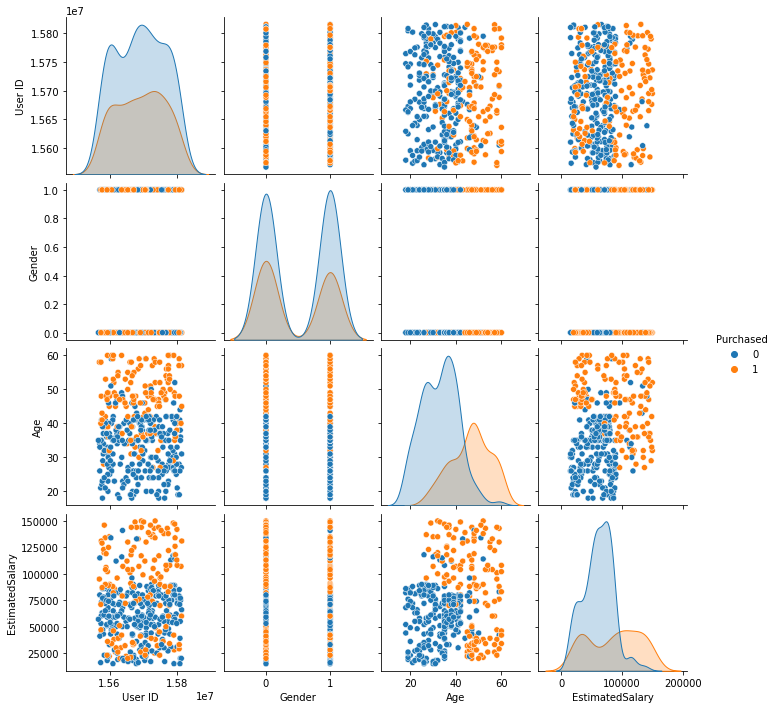

In [75]:
sns.pairplot(data, hue='Purchased');

In [76]:
corr = data.corr()
data.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


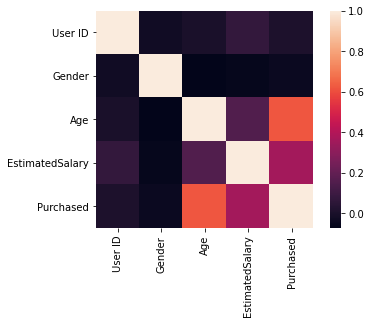

In [77]:
sns.heatmap(
    corr, 
    square=True)

# Model Buidling with Linear Models

In [51]:
#Get the best random_state for generalized model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
for i in range(0,401):
    
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=i)
    model = LogisticRegression()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Testing {}  Training {}  Random State {}".format(test_score,train_score,i))
else: print("No Generalised Model Found")

Testing 0.725  Training 0.621875  Random State 0
Testing 0.6875  Training 0.63125  Random State 3
Testing 0.7375  Training 0.61875  Random State 4
Testing 0.6625  Training 0.6375  Random State 5
Testing 0.65  Training 0.640625  Random State 6
Testing 0.675  Training 0.634375  Random State 7
Testing 0.675  Training 0.634375  Random State 8
Testing 0.65  Training 0.640625  Random State 10
Testing 0.6625  Training 0.6375  Random State 11
Testing 0.7125  Training 0.703125  Random State 12
Testing 0.7125  Training 0.625  Random State 13
Testing 0.675  Training 0.634375  Random State 16
Testing 0.7  Training 0.628125  Random State 17
Testing 0.7  Training 0.628125  Random State 21
Testing 0.65  Training 0.640625  Random State 24
Testing 0.6625  Training 0.6375  Random State 25
Testing 0.75  Training 0.615625  Random State 26
Testing 0.675  Training 0.634375  Random State 27
Testing 0.7  Training 0.628125  Random State 28
Testing 0.6875  Training 0.63125  Random State 29
Testing 0.6875  Train

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
for i in range(0,201):
    
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=i)
    model = LinearDiscriminantAnalysis()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Testing {}  Training {}  Random State {}".format(test_score,train_score,i))
else: print("No Generalised Model Found")

Testing 0.9125  Training 0.825  Random State 0
Testing 0.9  Training 0.84375  Random State 4
Testing 0.875  Training 0.85  Random State 5
Testing 0.875  Training 0.83125  Random State 7
Testing 0.9  Training 0.840625  Random State 10
Testing 0.8625  Training 0.853125  Random State 15
Testing 0.8625  Training 0.859375  Random State 16
Testing 0.8625  Training 0.83125  Random State 18
Testing 0.8625  Training 0.84375  Random State 21
Testing 0.875  Training 0.85  Random State 22
Testing 0.875  Training 0.846875  Random State 24
Testing 0.8625  Training 0.84375  Random State 26
Testing 0.8625  Training 0.85  Random State 27
Testing 0.8625  Training 0.83125  Random State 30
Testing 0.8625  Training 0.85625  Random State 31
Testing 0.875  Training 0.85  Random State 32
Testing 0.875  Training 0.85  Random State 33
Testing 0.875  Training 0.8375  Random State 35
Testing 0.8625  Training 0.840625  Random State 36
Testing 0.8875  Training 0.834375  Random State 38
Testing 0.875  Training 0.85 

In [56]:
 from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
 X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=76)
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(X_train,y_train)
    
train_score1 = model_LDA.score(X_train,y_train)
test_score1 = model_LDA.score(X_test,y_test)

print(test_score1,train_score1)

0.9375 0.834375


# Model Building with non Linear models

In [57]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(0,401):
    
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=i)
    model = KNeighborsClassifier()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Testing {}  Training {}  Random State {}".format(test_score,train_score,i))
else: print("No Generalised Model Found")

Testing 0.8625  Training 0.85625  Random State 17
Testing 0.8875  Training 0.875  Random State 59
Testing 0.8625  Training 0.846875  Random State 68
Testing 0.9  Training 0.84375  Random State 116
Testing 0.875  Training 0.853125  Random State 121
Testing 0.875  Training 0.853125  Random State 125
Testing 0.8625  Training 0.846875  Random State 161
Testing 0.8625  Training 0.859375  Random State 170
Testing 0.8625  Training 0.853125  Random State 179
Testing 0.9125  Training 0.86875  Random State 192
Testing 0.875  Training 0.84375  Random State 228
Testing 0.8625  Training 0.85625  Random State 257
Testing 0.875  Training 0.85625  Random State 284
Testing 0.8625  Training 0.85625  Random State 302
Testing 0.875  Training 0.871875  Random State 303
Testing 0.9375  Training 0.85  Random State 323
Testing 0.875  Training 0.871875  Random State 326
Testing 0.8625  Training 0.85625  Random State 328
Testing 0.875  Training 0.846875  Random State 336
Testing 0.875  Training 0.85625  Random 

In [50]:
from sklearn.tree import DecisionTreeClassifier
for i in range(0,400):
    
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=i)
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Testing {}  Training {}  Random State {}".format(test_score,train_score,i))
else: print("No Generalised Model Found")

No Generalised Model Found


In [31]:
from sklearn.naive_bayes import GaussianNB
for i in range(0,400):
    
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=i)
    model = GaussianNB()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Testing {}  Training {}  Random State {}".format(test_score,train_score,i))
else: print("No Generalised Model Found")

Testing 0.925  Training 0.884375  Random State 0
Testing 0.925  Training 0.8875  Random State 4
Testing 0.925  Training 0.890625  Random State 6
Testing 0.925  Training 0.875  Random State 7
Testing 0.9125  Training 0.8875  Random State 10
Testing 0.9  Training 0.896875  Random State 16
Testing 0.8875  Training 0.871875  Random State 18
Testing 0.9  Training 0.8875  Random State 21
Testing 0.9125  Training 0.88125  Random State 23
Testing 0.9625  Training 0.878125  Random State 24
Testing 0.9125  Training 0.896875  Random State 26
Testing 0.9  Training 0.884375  Random State 27
Testing 0.9125  Training 0.871875  Random State 30
Testing 0.9  Training 0.89375  Random State 32
Testing 0.9375  Training 0.884375  Random State 33
Testing 0.9125  Training 0.878125  Random State 35
Testing 0.9125  Training 0.89375  Random State 38
Testing 0.925  Training 0.884375  Random State 40
Testing 0.9375  Training 0.8625  Random State 42
Testing 0.925  Training 0.871875  Random State 45
Testing 0.9  Tra

In [32]:
from sklearn.svm import SVC
for i in range(0,400):
    
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=i)
    model = SVC()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Testing {}  Training {}  Random State {}".format(test_score,train_score,i))
else: print("No Generalised Model Found")

Testing 0.825  Training 0.7625  Random State 0
Testing 0.8  Training 0.7625  Random State 3
Testing 0.8125  Training 0.759375  Random State 4
Testing 0.825  Training 0.759375  Random State 5
Testing 0.85  Training 0.74375  Random State 6
Testing 0.8  Training 0.759375  Random State 8
Testing 0.7875  Training 0.765625  Random State 10
Testing 0.8125  Training 0.759375  Random State 16
Testing 0.8125  Training 0.75625  Random State 17
Testing 0.8  Training 0.75625  Random State 20
Testing 0.7875  Training 0.7625  Random State 21
Testing 0.875  Training 0.74375  Random State 24
Testing 0.8  Training 0.7625  Random State 25
Testing 0.8  Training 0.765625  Random State 26
Testing 0.775  Training 0.76875  Random State 28
Testing 0.775  Training 0.765625  Random State 32
Testing 0.7875  Training 0.759375  Random State 34
Testing 0.8  Training 0.75625  Random State 35
Testing 0.7875  Training 0.76875  Random State 37
Testing 0.7875  Training 0.765625  Random State 39
Testing 0.7875  Training 0

#Model Building with Essembling Methods

In [33]:
from sklearn.ensemble import AdaBoostClassifier
for i in range(0,201):
    
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=i)
    model = AdaBoostClassifier()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Testing {}  Training {}  Random State {}".format(test_score,train_score,i))
else: print("No Generalised Model Found")

Testing 0.925  Training 0.921875  Random State 4
Testing 0.9375  Training 0.915625  Random State 17
Testing 0.9625  Training 0.915625  Random State 24
Testing 0.9375  Training 0.915625  Random State 25
Testing 0.9375  Training 0.925  Random State 39
Testing 0.9625  Training 0.90625  Random State 40
Testing 0.925  Training 0.921875  Random State 45
Testing 0.9375  Training 0.9125  Random State 65
Testing 0.9375  Training 0.928125  Random State 66
Testing 0.95  Training 0.909375  Random State 68
Testing 0.95  Training 0.909375  Random State 76
Testing 0.9375  Training 0.91875  Random State 88
Testing 0.9125  Training 0.9  Random State 90
Testing 0.9625  Training 0.909375  Random State 101
Testing 0.925  Training 0.91875  Random State 116
Testing 0.9375  Training 0.921875  Random State 122
Testing 0.9375  Training 0.915625  Random State 124
Testing 0.9375  Training 0.91875  Random State 125
Testing 0.9375  Training 0.915625  Random State 128
Testing 0.9375  Training 0.93125  Random State 

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
for i in range(0,401):
    
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=i)
    model = GradientBoostingClassifier()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Testing {}  Training {}  Random State {}".format(test_score,train_score,i))
else: print("No Generalised Model Found")

Testing 0.975  Training 0.95625  Random State 198
Testing 0.9625  Training 0.959375  Random State 326


In [49]:
from sklearn.ensemble import RandomForestClassifier
for i in range(0,401):
    
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=i)
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Testing {}  Training {}  Random State {}".format(test_score,train_score,i))
else: print("No Generalised Model Found")

No Generalised Model Found


In [48]:
from sklearn.ensemble import ExtraTreesClassifier
for i in range(0,401):
    
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=i)
    model = ExtraTreesClassifier()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Testing {}  Training {}  Random State {}".format(test_score,train_score,i))
else: print("No Generalised Model Found")

No Generalised Model Found


# Model Selection

Model Selection

1. Logistic Regression : Testing 0.75  Training 0.615625 Random State 26
2. LDA : Testing 0.9375  Training 0.834375  Random State 76
3. KNN : Testing 0.9375  Training 0.85  Random State 323
4. DecisionTreeClassifier: **No Generalised Model found**
5. Gaussian Navie Bayes: Testing 0.9625  Training 0.85625  Random State 366
6. SVC: Testing 0.8625  Training 0.74375  Random State 125
7. AdaBoostClassifier: Testing 0.9625  Training 0.915625  Random State 24
8. ***GradientBoostingClassifier: Testing 0.975  Training 0.95625  Random State 198*** (Model Selected)
9. RandomForestClassifier:** No Generalised Model found**
10. ExtraTreesClassifier: **No Generalised Model found**


In [65]:
#***GradientBoostingClassifier: Testing 0.975  Training 0.95625  Random State 198*** (Model Selected)
from sklearn.ensemble import GradientBoostingClassifier

    
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=i)
model_final = GradientBoostingClassifier()
model_final.fit(X_train,y_train)
    
train_score = model_final.score(X_train,y_train)
test_score = model_final.score(X_test,y_test)

print(train_score, test_score)
    
  



0.971875 0.9125


# Model Evalution

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label, model_final.predict(features))
cm

array([[250,   7],
       [  9, 134]])

In [67]:
#Since dataset is unbalanced
from sklearn.metrics import classification_report
cr = classification_report(label, model_final.predict(features))
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       257
           1       0.95      0.94      0.94       143

    accuracy                           0.96       400
   macro avg       0.96      0.95      0.96       400
weighted avg       0.96      0.96      0.96       400

